# Subir información

In [1]:
import pandas as pd

result_3d = pd.read_csv("data.csv", engine='python', encoding='utf-8')

#result_3d

In [2]:
import pandas as pd

centroids_3d = pd.read_csv("centroids_3d.csv")

#centroids_3d

# Plotly

## Ordenar saltos de línea para mostrar correctamente los títulos

In [3]:
import pandas as pd
import numpy as np

n = 1000   # Número de abstracts 

titulos = result_3d.iloc[:,0].to_numpy().flatten()

iteraciones = len(titulos.max()) % 50

for k in range(iteraciones):
    m = 40 + 50*k
    titulos = [i[:i.index(' ', m)] + '<br>' + i[i.index(' ', m)+1:] 
           if len(i)>50*k and " " in i[m:]
           else i 
           for i in titulos]

result_3d['titulos'] = titulos.copy()

#result_3d

In [5]:
import plotly.graph_objects as go
import plotly.express as px
import webbrowser
import numpy as np

fig = go.Figure()

# Configuración de la visualización de los vectores
fig.update_layout(
    title=dict(
            text='Clustering',
            font=dict(
                    family='Courier New',
                    size=40),
            pad=dict(l=300, r=0, b=0,t=40)),
    hoverlabel=dict(
                align='left',
                font_size=12,
                font_family="Courier New"),
    scene = dict(
            xaxis = dict(
                title="",                             # Etiqueta del eje
                backgroundcolor="rgb(200, 200, 230)", # Color de fondo
                gridcolor="blue",                     # Color de lineas del eje de coordenadas en el plano
                showbackground=False,                 # Mostrar fondo 
                showspikes=False,                     # Mostrar lineas del eje de coordenadas en el espacio
                showgrid=False,                       # Mostrar lineas del eje de coordenadas en el plano
                showticklabels=False),                # Mostrar etiquetas del eje (recta numérica)
            yaxis = dict(
                title="",
                backgroundcolor="rgb(200, 200, 230)",
                gridcolor="blue",
                showbackground=False,
                showspikes=False,
                showgrid=False,
                showticklabels=False),
            zaxis = dict(
                title="",
                backgroundcolor="rgb(200, 200, 230)",
                gridcolor="blue",
                showbackground=False,
                showspikes=False,
                showgrid=False,
                showticklabels=False)),
    hovermode='closest',
    height=700,
    width=1100,
    margin=dict(r=10, l=0,b=10, t=60)
)


# Añadimos cada uno de los clusteres

for uid, i in enumerate(centroids_3d['labels']):
    fig.add_trace(go.Scatter3d(
        x=result_3d.loc[result_3d.labels == i, :].x,   # Coordenadas x
        y=result_3d.loc[result_3d.labels == i, :].y,   # Coordenadas y
        z=result_3d.loc[result_3d.labels == i, :].z,   # Coordenadas z
        text =result_3d.loc[result_3d.labels == i, :].titulos,   # Texto que se muestra al pasar el cursor
        #text=titulo,                   # Texto que se muestra al pasar el cursor
        hoverinfo='text',               # Listado de información a mostrar al pasar el cursor
        name=centroids_3d['word'][i],   # Nombre del grupo
        uid=str(uid),            # Identificador del cluster
        mode='markers',
        marker=dict(
            size=2,                   # tamaño del punto
            #color=df['labels'],      # subconjuntos en los cuales se divide el total de los datos
            color=px.colors.qualitative.Alphabet[int(i)],    # color de los subconjuntos
            opacity=0.8              # opacidad
            )
    ))


# Conficuración click action
scatter3d = fig.data

fig.layout.hovermode = 'closest'

def do_click(trace, points, state):
    print('points.point_inds')
    if points.point_inds:
        ind = points.point_inds[0]
        #url = df.link.iloc[ind]
        url = 'https://google.com'
        webbrowser.open_new_tab(url)

for scatter_ in scatter3d:
    scatter_.on_click(do_click)

#fig

    
#fig.show()


In [25]:
go.layout

AttributeError: module 'plotly.graph_objs.layout' has no attribute 'clickmode'

In [26]:
#help(go.Figure().add_trace)

help(go.layout)



Help on package plotly.graph_objs.layout in plotly.graph_objs:

NAME
    plotly.graph_objs.layout

PACKAGE CONTENTS
    _activeselection
    _activeshape
    _annotation
    _coloraxis
    _colorscale
    _font
    _geo
    _grid
    _hoverlabel
    _image
    _legend
    _mapbox
    _margin
    _modebar
    _newselection
    _newshape
    _polar
    _scene
    _selection
    _shape
    _slider
    _smith
    _template
    _ternary
    _title
    _transition
    _uniformtext
    _updatemenu
    _xaxis
    _yaxis
    annotation (package)
    coloraxis (package)
    geo (package)
    grid (package)
    hoverlabel (package)
    legend (package)
    mapbox (package)
    newselection (package)
    newshape (package)
    polar (package)
    scene (package)
    selection (package)
    shape (package)
    slider (package)
    smith (package)
    template (package)
    ternary (package)
    title (package)
    updatemenu (package)
    xaxis (package)
    yaxis (package)

CLASSES
    plotly.base

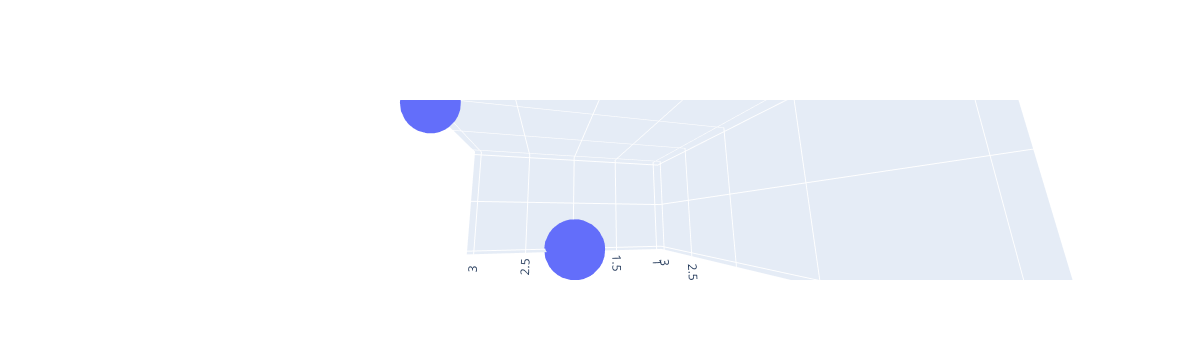

In [6]:
import webbrowser
import pandas as pd
import plotly.graph_objs as go

df = pd.DataFrame({'x': [1, 2, 3],
                   'y': [1, 3, 2],
                   'z': [2, 3, 2],
                   'link': ['https://google.com', 'https://bing.com', 'https://duckduckgo.com']})

fig = go.FigureWidget([go.Scatter3d(x=df.x, y=df.y, z=df.z, mode='markers', marker={'size': 20})])

scatter = fig.data[0]

#print(fig.data)

fig.layout.hovermode = 'closest'


def do_click(trace, points, state):
    print(points.point_inds)
    if points.point_inds:
        ind = points.point_inds[0]
        url = df.link.iloc[ind]
        #url = "<a href='https://www.youtube.com'>https://www.youtube.com</a>"
        #url = 'https://www.youtube.com'
        #print(str(url))
        webbrowser.open_new_tab(url)
        
scatter.on_click(do_click)


fig.show()

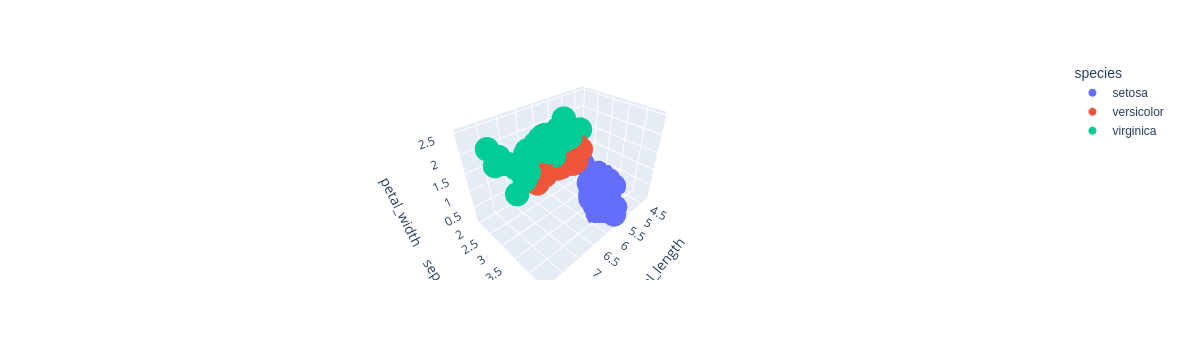

In [7]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()